# **Data Visualization**

### *Install requirements*

In [ ]:
!pip install itk

In [ ]:
!pip install itkwidgets

     |████████████████████████████████| 3.4MB 4.6MB/s 
     |████████████████████████████████| 593kB 43.5MB/s 
     |████████████████████████████████| 266kB 40.7MB/s 
     |████████████████████████████████| 1.6MB 33.3MB/s 
     |████████████████████████████████| 2.0MB 49.3MB/s 
     |████████████████████████████████| 2.4MB 43.6MB/s 


### *Import Libraries*

In [ ]:
import json
import numpy as np
import pandas as pd
import nibabel as nib

import torch

# For visualization
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### *Load file and Extract the data as a numpy array*

In [ ]:
image_folder = "/content/drive/My Drive/BrainTumourData/imagesTr/"
img_name = 'BRATS_001.nii.gz'
image_obj = nib.load(image_folder + img_name)

image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [ ]:
# Get the image shape

height, width, depth, channels = image_data.shape
print(f"The image object has the following dimensions: \nheight: {height} \nwidth: {width} \ndepth: {depth} \nchannels: {channels}")

The image object has the following dimensions: 
height: 240 
width: 240 
depth: 155 
channels: 4


### *Visualize the data*

Plotting Layer 78 Channel 3 of Image


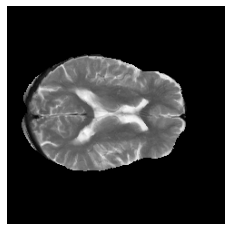

In [ ]:
# Select random layer number

layer = 78           #@param {type:"slider", min:0, max:100, step:1}
channel =  3    #@param {type:"slider", min:0, max:3, step:1}
print(f"Plotting Layer {layer} Channel {channel} of Image")
plt.imshow(image_data[:, :, layer, channel], cmap='gray')
plt.axis('off');

In [ ]:
# Define a function to visualize the Brain MRI

def explore_3dimage(layer):
    plt.figure(figsize=(10, 5))
    channel = 3
    plt.imshow(image_data[:, :, layer, channel], cmap='gray');
    plt.title('Explore Layers of Brain MRI', fontsize=20)
    plt.axis('off')
    return layer

# Run the ipywidgets interact() function to explore the data
interact(explore_3dimage, layer=(0, image_data.shape[2] - 1));

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

### *Load file and Extract the **labels** as a numpy array*

In [ ]:
label_folder = '/content/drive/My Drive/BrainTumourData/labelsTr/'
label = 'BRATS_001.nii.gz'
label_obj = nib.load(label_folder+label)

label_array = label_obj.get_fdata()
type(label_array)

numpy.ndarray

In [ ]:
# Extract the shape of the labels data

height, width, depth = label_array.shape
print(f"Dimensions of labels data array: \nheight: {height} \nwidth: {width} \ndepth: {depth}")
print(f'\nWith the unique values: {np.unique(label_array)}')
print("""\nCorresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor""")

Dimensions of labels data array: 
height: 240 
width: 240 
depth: 155

With the unique values: [0. 1. 2. 3.]

Corresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor


### *Visualize Labeled Data*

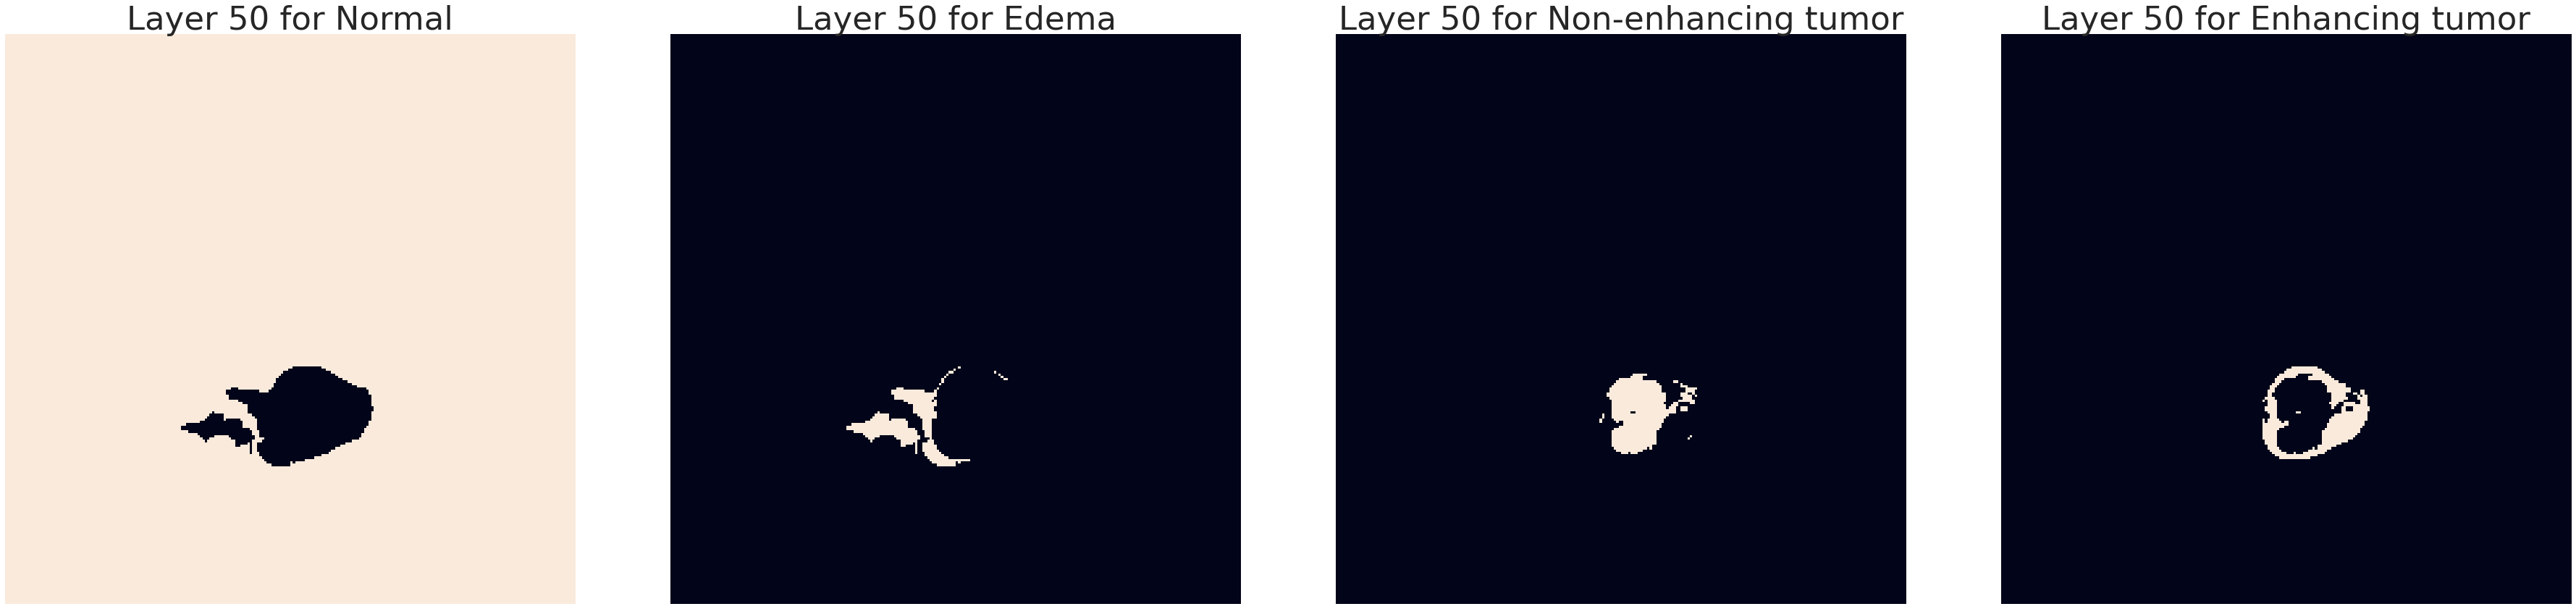

In [ ]:
layer = 69      #@param {type:"slider", min:0, max:100, step:1}

# Define a dictionary of class labels
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

In [ ]:
# Create button values
select_class = ToggleButtons(
    options=['Normal','Edema', 'Non-enhancing tumor', 'Enhancing tumor'],
    description='Select Class:',
    disabled=False,
    button_style='info', 
    
)

# Create layer slider
select_layer = IntSlider(min=0, max=154, description='Select Layer', continuous_update=False)
    
# Define a function for plotting images
def plot_image(seg_class, layer):
    print(f"Plotting {layer} Layer Label: {seg_class}")
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[:,:,layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis('off');

# Use the interactive() tool to create the visualization
interactive(plot_image, seg_class=select_class, layer=select_layer)

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Normal', 'Edem…